<a href="https://colab.research.google.com/github/hyunet/gapminderproject/blob/main/08_%E1%84%8B%E1%85%B3%E1%86%B7%E1%84%89%E1%85%B5%E1%86%A8%E1%84%86%E1%85%AE%E1%86%AF%E1%84%8A%E1%85%B3%E1%84%85%E1%85%A6%E1%84%80%E1%85%B5%E1%84%87%E1%85%A2%E1%84%8E%E1%85%AE%E1%86%AF%E1%84%85%E1%85%A3%E1%86%BC_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


부산지역 2019~2020년 RFID기반 음식물쓰레기 배출량를 분석하시오.
+ 출처 : 공공데이터 포털 한국환경공단_RFID기반 음식물쓰레기 배출정보 OPEN API를 통해 자료 추출

---

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

#마이너스 부호표시
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

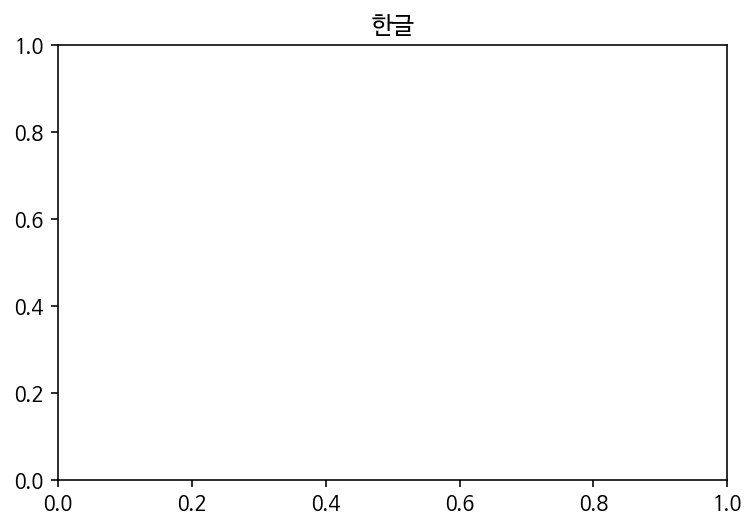

In [ ]:
plt.title('한글')
plt.show()

## 데이터불러오기



In [ ]:
#pandas 라이브러리 추가
import pandas as pd

In [ ]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/00_동영상_파이썬/data/08_부산RFID음식물쓰레기.csv')
df

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명
0,2019-01-01,3,258000,3.47,188,3.35,W0Q,부산광역시,중구
1,2019-01-02,4,273050,3.68,200,3.56,W0Q,부산광역시,중구
2,2019-01-03,5,254300,3.42,196,3.49,W0Q,부산광역시,중구
3,2019-01-04,6,241150,3.25,182,3.24,W0Q,부산광역시,중구
4,2019-01-05,7,234750,3.16,192,3.42,W0Q,부산광역시,중구
...,...,...,...,...,...,...,...,...,...
11691,2020-12-27,1,15960200,3.31,8758,3.26,W15,부산광역시,기장군
11692,2020-12-28,2,17536140,3.63,9639,3.59,W15,부산광역시,기장군
11693,2020-12-29,3,13130890,2.72,7845,2.92,W15,부산광역시,기장군
11694,2020-12-30,4,12697560,2.63,7669,2.86,W15,부산광역시,기장군


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      11696 non-null  object 
 1   요일      11696 non-null  int64  
 2   배출량     11696 non-null  int64  
 3   배출량비율   11696 non-null  float64
 4   배출횟수    11696 non-null  int64  
 5   배출횟수비율  11696 non-null  float64
 6   영역코드    11696 non-null  object 
 7   시도명     11696 non-null  object 
 8   시군구명    11696 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 822.5+ KB


In [ ]:
df.columns

Index(['일자', '요일', '배출량', '배출량비율', '배출횟수', '배출횟수비율', '영역코드', '시도명', '시군구명'], dtype='object')

## **열 타입 변경**


---
+ df.dtypes : 데이터타입 확인
+ df[열명].astype(변환타입)
  + 정수형은 .astype(‘int’)
  + 문자형은 .astype(‘str’)
  + 범주형은 .astype(‘category’)
+ pd.to_numeric(열): 문자열 칼럼의 숫자형 변환
+ pd.to_datetime(열) : 날짜형식으로 변경



In [ ]:
#일자를 날짜 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  int64         
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 822.5+ KB


### 시계열 자료형
* **dt 접근자** : datetime 자료형 시리즈에는 dt 접근자가 있어 datetime 자료형이 가진 몇가지 유용한 속성과 메서드를 사용
  +  year, month, day, weekday 등의 속성을 이용하면 년, 월, 일, 요일 정보 추출

dt 접근자 | 내용
-------------------|------------------
.dt.date         | YYYY-MM-DD(문자)
.dt.year         | 연(4자리숫자)
.dt.month        | 월(숫자)
.dt.month_name() | 월(문자)
.dt.day          | 일(숫자)
.dt.time         | HH:MM:SS(문자)
.dt.hour         | 시(숫자)
.dt.minute       | 분(숫자)
.dt.second       | 초(숫자)
.dt.quarter       | 분기(숫자)
.dt.day_name()  | 요일이름(문자)  
.dt.weekday       | 요일숫자(0-월, 1-화) (=dayofweek)
.dt.weekofyear    | 연 기준 몇주째(숫자) (=week)
.dt.dayofyear     | 연 기준 몇일째(숫자)
.dt.days_in_month | 월 일수(숫자) (=daysinmonth)

In [ ]:
df['요일2'] = df['일자'].dt.day_name()
df.head()

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명,요일2
0,2019-01-01,3,258000,3.47,188,3.35,W0Q,부산광역시,중구,Tuesday
1,2019-01-02,4,273050,3.68,200,3.56,W0Q,부산광역시,중구,Wednesday
2,2019-01-03,5,254300,3.42,196,3.49,W0Q,부산광역시,중구,Thursday
3,2019-01-04,6,241150,3.25,182,3.24,W0Q,부산광역시,중구,Friday
4,2019-01-05,7,234750,3.16,192,3.42,W0Q,부산광역시,중구,Saturday


In [ ]:
#연도/월 추출하여 연도/월 열 추가
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month

In [ ]:
#추가 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  int64         
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
 9   요일2     11696 non-null  object        
 10  연도      11696 non-null  int64         
 11  월       11696 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


### 카테고리 자료형
* 판다스의 데이터타입으로 데이터프레임의 열의 값이 특정한 형태의 값이 반복되는 경우 사용
  + 예) 남성/여성, 10대/20대/30대...
+ 카테코리형 데이터를 이용하면 반복된 데이터를 코드화하여 데이터 사이즈를 줄여서 메모리 사용이 줄어 들고 데이터처리 속도가 빨라짐
+ category 데이터 타입은 hybrid 데이터타입으로 보기에는 string처럼 보이나 내부적으로는 int배열로 표현되어 있음
  + 정수 기반의 범주형 데이터를 표현할 수 있음

In [ ]:
# 요일, 연도와 월을 범주형 데이터타입으로 변경
df['요일'] = df['요일'].astype('category')
df['연도'] = df['연도'].astype('category')
df['월'] =   df['월'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  category      
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
 9   요일2     11696 non-null  object        
 10  연도      11696 non-null  category      
 11  월       11696 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 857.6+ KB


In [ ]:
#지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#지수표현 돌리기
pd.reset_option('display.float_format')
#pd.set_option('display.float_format', '{:.2e}'.format)

## 데이터프레임 기술 통계 정보
+ **df.describe()**
  + 수치형 자료 : 갯수, 평균, 표준편차, 최대값, 최소값, 분위수
  + 범주형 자료 : 고유값수(unique), 최빈값(top), 빈도수(freq)
  + include :'all', dtypes 또는 None(기본값)의 목록과 유사, 선택 사항

In [ ]:
#기초 통계량 : 수치형 자료
df.describe()

,배출량,배출량비율,배출횟수,배출횟수비율
count,1.169600e+04,11696.000000,11696.000000,11696.000000
mean,1.465365e+07,3.283173,9417.056857,3.283194
std,9.626663e+06,0.504231,6139.618469,0.386996
min,1.194000e+05,1.250000,86.000000,1.100000
25%,7.087912e+06,2.990000,4707.250000,3.090000
50%,1.412248e+07,3.200000,9087.000000,3.260000
75%,2.003032e+07,3.500000,12825.000000,3.450000
max,6.710435e+07,7.180000,40623.000000,6.360000


In [ ]:
#기초 통계량 : 범주형 object 자료
df.describe(include='O')

,영역코드,시도명,시군구명,요일2
count,11696,11696,11696,11696
unique,16,1,16,7
top,W0Q,부산광역시,중구,Tuesday
freq,731,11696,731,1680


In [ ]:
#기초 통계량 : 범주형 category 자료
df.describe(include='category')

,요일,연도,월
count,11696,11696,11696
unique,7,2,12
top,3,2020,1
freq,1680,5856,992


In [ ]:
#기초 통계량 : 범주형 object, category 자료
df.describe(include=['category', 'object'])

,요일,영역코드,시도명,시군구명,요일2,연도,월
count,11696,11696,11696,11696,11696,11696,11696
unique,7,16,1,16,7,2,12
top,3,W0Q,부산광역시,중구,Tuesday,2020,1
freq,1680,731,11696,731,1680,5856,992


In [ ]:
#기초 통계량 : 전체 자료
df.describe(include='all')

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명,요일2,연도,월,요일명
count,11696,11696.0,1.169600e+04,11696.000000,11696.000000,11696.000000,11696,11696,11696,11696,11696.0,11696.0,11696
unique,731,7.0,NaN,NaN,NaN,NaN,16,1,16,7,2.0,12.0,7
top,2019-01-01 00:00:00,3.0,NaN,NaN,NaN,NaN,W0Q,부산광역시,중구,Tuesday,2020.0,1.0,화
freq,16,1680.0,NaN,NaN,NaN,NaN,731,11696,731,1680,5856.0,992.0,1680
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.465365e+07,3.283173,9417.056857,3.283194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.626663e+06,0.504231,6139.618469,0.386996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.194000e+05,1.250000,86.000000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.087912e+06,2.990000,4707.250000,3.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **각 열의 범주형 자료 분석**

+ **df.drop_duplicates()** : 중복값은 모두 제거하고 유일한 값만 표시
+ **df.unique()**: 각 열 내에 유일한 값을 확인
+ **df.value_counts()** : 각 열 내에 각각의 값이 나온 횟수
+ 시리즈.map(딕션너리) : 해당 시리즈의 내용에 매핑할 값을 딕셔너리 형태로 지정
  + 시리즈.map({x:y}) : 해당 시리즈의 x를 y로 변경

In [ ]:
#요일자료 분석 (1-7 :일-토)
df['요일'].unique()

[3, 4, 5, 6, 7, 1, 2]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [ ]:
#요일자료 갯수 확인
df['요일'].value_counts().sort_index()

1    1664
2    1664
3    1680
4    1680
5    1680
6    1664
7    1664
Name: 요일, dtype: int64

In [ ]:
#요일 숫자를 이용하여 요일명 생성
dt = {1:'일', 2:'월', 3:'화', 4:'수', 5:'목', 6:'금', 7:'토'}
df['요일명'] =  df['요일'].map(dt)

In [ ]:
df.head()

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명,요일2,연도,월,요일명
0,2019-01-01,3,258000,3.47,188,3.35,W0Q,부산광역시,중구,Tuesday,2019,1,화
1,2019-01-02,4,273050,3.68,200,3.56,W0Q,부산광역시,중구,Wednesday,2019,1,수
2,2019-01-03,5,254300,3.42,196,3.49,W0Q,부산광역시,중구,Thursday,2019,1,목
3,2019-01-04,6,241150,3.25,182,3.24,W0Q,부산광역시,중구,Friday,2019,1,금
4,2019-01-05,7,234750,3.16,192,3.42,W0Q,부산광역시,중구,Saturday,2019,1,토


## 그룹화
* 데이터를 그룹별로 분류
* df.groupby(인수)
  + 열 또는 열의 리스트
  + 행 인덱스
* 그룹 연산 메소드
  + size, count: 그룹 데이터의 갯수
  + mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
  + sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
  + first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

In [ ]:
#연도별 요일별 배출량비율, 배출횟수비율 평균
dfg = df.groupby(['연도','요일명']).mean()[['배출량비율','배출횟수비율']]
dfg

배출량비율    배출횟수비율
연도   요일명                    
2019 일    3.855192  3.585120
     월    3.582764  3.517079
     화    3.203031  3.271167
     수    3.069243  3.182127
     목    3.218486  3.310733
     금    2.991214  3.105349
     토    3.095409  3.042139
2020 일    3.881490  3.601538
     월    3.377031  3.332284
     화    3.238341  3.307825
     수    3.113408  3.226521
     목    3.100755  3.203691
     금    3.056142  3.157993
     토    3.190228  3.124002

In [ ]:
#인덱스 재설정
dfg = dfg.reset_index()
dfg

,연도,요일명,배출량비율,배출횟수비율
0,2019,일,3.855192,3.585120
1,2019,월,3.582764,3.517079
2,2019,화,3.203031,3.271167
3,2019,수,3.069243,3.182127
4,2019,목,3.218486,3.310733
5,2019,금,2.991214,3.105349
6,2019,토,3.095409,3.042139
7,2020,일,3.881490,3.601538
8,2020,월,3.377031,3.332284
9,2020,화,3.238341,3.307825


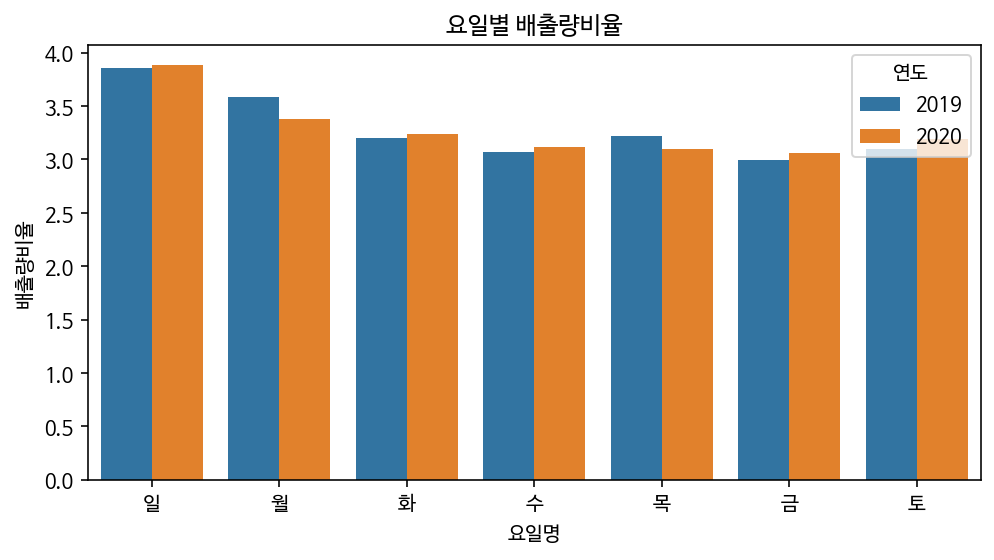

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='요일명', y='배출량비율', hue='연도', data=dfg)
plt.title("요일별 배출량비율")
plt.show()


## 데이터프레임 합치기
+ pd.concat()  데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수
  + axis : 연결 방향 (0-행, 1-열)
  + join : 방식 (outer : 합집합, inner :교집합)
```
pd.concat([연결할 데이터프레임명리스트],axis=1, join='inner')
```

In [ ]:
#2019, 2020년 자료 분리
dfg2019 = dfg[dfg['연도'] == 2019]
dfg2020 = dfg[dfg['연도'] == 2020]

In [ ]:
dfg2019

,연도,요일명,배출량비율,배출횟수비율
0,2019,일,3.855192,3.585120
1,2019,월,3.582764,3.517079
2,2019,화,3.203031,3.271167
3,2019,수,3.069243,3.182127
4,2019,목,3.218486,3.310733
5,2019,금,2.991214,3.105349
6,2019,토,3.095409,3.042139


In [ ]:
dfg2020

,연도,요일명,배출량비율,배출횟수비율
7,2020,일,3.881490,3.601538
8,2020,월,3.377031,3.332284
9,2020,화,3.238341,3.307825
10,2020,수,3.113408,3.226521
11,2020,목,3.100755,3.203691
12,2020,금,3.056142,3.157993
13,2020,토,3.190228,3.124002


In [ ]:
#2019, 2020년 요일을 인덱스로 설정
dfg2019 =  dfg2019.set_index('요일명')
dfg2020 =  dfg2020.set_index('요일명')

In [ ]:
dfg2019

,연도,배출량비율,배출횟수비율
요일명,,,
일,2019,3.855192,3.585120
월,2019,3.582764,3.517079
화,2019,3.203031,3.271167
수,2019,3.069243,3.182127
목,2019,3.218486,3.310733
금,2019,2.991214,3.105349
토,2019,3.095409,3.042139


In [ ]:
dfg2020

,연도,배출량비율,배출횟수비율
요일명,,,
일,2020,3.881490,3.601538
월,2020,3.377031,3.332284
화,2020,3.238341,3.307825
수,2020,3.113408,3.226521
목,2020,3.100755,3.203691
금,2020,3.056142,3.157993
토,2020,3.190228,3.124002


In [ ]:
#2019, 2020년 합치기
dfgw =  pd.concat([dfg2019, dfg2020])
dfgw

,연도,배출량비율,배출횟수비율
요일명,,,
일,2019,3.855192,3.585120
월,2019,3.582764,3.517079
화,2019,3.203031,3.271167
수,2019,3.069243,3.182127
목,2019,3.218486,3.310733
금,2019,2.991214,3.105349
토,2019,3.095409,3.042139
일,2020,3.881490,3.601538
월,2020,3.377031,3.332284


In [ ]:
#2019, 2020년 배출량비율	배출횟수비율
dfgw =   pd.concat([dfg2019, dfg2020], axis=1)
dfgw

,연도,배출량비율,배출횟수비율,연도,배출량비율,배출횟수비율
요일명,,,,,,
일,2019,3.855192,3.585120,2020,3.881490,3.601538
월,2019,3.582764,3.517079,2020,3.377031,3.332284
화,2019,3.203031,3.271167,2020,3.238341,3.307825
수,2019,3.069243,3.182127,2020,3.113408,3.226521
목,2019,3.218486,3.310733,2020,3.100755,3.203691
금,2019,2.991214,3.105349,2020,3.056142,3.157993
토,2019,3.095409,3.042139,2020,3.190228,3.124002


In [ ]:
dfgw = dfgw.iloc[: , [1,2,4, 5]]
dfgw

,배출량비율,배출횟수비율,배출량비율,배출횟수비율
요일명,,,,
일,3.855192,3.585120,3.881490,3.601538
월,3.582764,3.517079,3.377031,3.332284
화,3.203031,3.271167,3.238341,3.307825
수,3.069243,3.182127,3.113408,3.226521
목,3.218486,3.310733,3.100755,3.203691
금,2.991214,3.105349,3.056142,3.157993
토,3.095409,3.042139,3.190228,3.124002


In [ ]:
#열명변경 : '2019배출량비율', '2019배출횟수비율','2020배출량비율', '2020배출횟수비율'
dfgw.columns = ['2019배출량비율', '2019배출횟수비율','2020배출량비율', '2020배출횟수비율' ]

In [ ]:
dfgw

,2019배출량비율,2019배출횟수비율,2020배출량비율,2020배출횟수비율
요일명,,,,
일,3.855192,3.585120,3.881490,3.601538
월,3.582764,3.517079,3.377031,3.332284
화,3.203031,3.271167,3.238341,3.307825
수,3.069243,3.182127,3.113408,3.226521
목,3.218486,3.310733,3.100755,3.203691
금,2.991214,3.105349,3.056142,3.157993
토,3.095409,3.042139,3.190228,3.124002


In [ ]:
#경고 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#배출량비율과 배출횟수비율 차이
dfgw['배출량비율차이'] =  dfgw['2020배출량비율'] -  dfgw['2019배출량비율']
dfgw['배출횟수비율차이'] =  dfgw['2020배출횟수비율'] -  dfgw['2019배출횟수비율']

In [ ]:
dfgw

,2019배출량비율,2019배출횟수비율,2020배출량비율,2020배출횟수비율,배출량비율차이,배출횟수비율차이
요일명,,,,,,
일,3.855192,3.585120,3.881490,3.601538,0.026298,0.016418
월,3.582764,3.517079,3.377031,3.332284,-0.205733,-0.184796
화,3.203031,3.271167,3.238341,3.307825,0.035311,0.036657
수,3.069243,3.182127,3.113408,3.226521,0.044165,0.044394
목,3.218486,3.310733,3.100755,3.203691,-0.117731,-0.107042
금,2.991214,3.105349,3.056142,3.157993,0.064928,0.052644
토,3.095409,3.042139,3.190228,3.124002,0.094820,0.081863


In [ ]:
dfgw.reset_index(inplace=True)
dfgw

,요일명,2019배출량비율,2019배출횟수비율,2020배출량비율,2020배출횟수비율,배출량비율차이,배출횟수비율차이
0,일,3.855192,3.585120,3.881490,3.601538,0.026298,0.016418
1,월,3.582764,3.517079,3.377031,3.332284,-0.205733,-0.184796
2,화,3.203031,3.271167,3.238341,3.307825,0.035311,0.036657
3,수,3.069243,3.182127,3.113408,3.226521,0.044165,0.044394
4,목,3.218486,3.310733,3.100755,3.203691,-0.117731,-0.107042
5,금,2.991214,3.105349,3.056142,3.157993,0.064928,0.052644
6,토,3.095409,3.042139,3.190228,3.124002,0.094820,0.081863


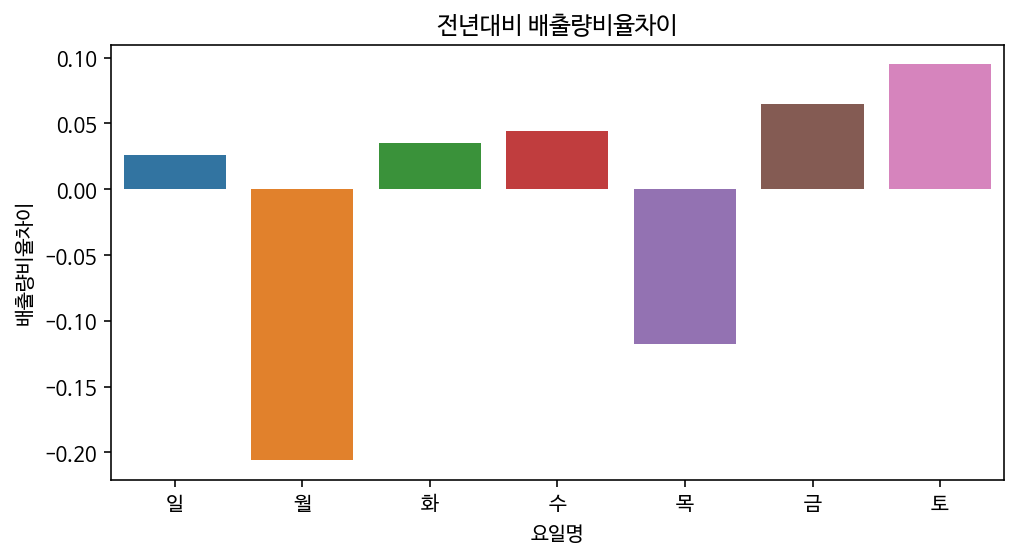

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='요일명', y='배출량비율차이', data=dfgw)
plt.title("전년대비 배출량비율차이")
plt.show()
